Alpha: 0.001, Accuracy: 0.6608
Alpha: 0.01, Accuracy: 0.6608
Alpha: 0.1, Accuracy: 0.6614
Alpha: 0.5, Accuracy: 0.6639
Alpha: 1, Accuracy: 0.6646
Alpha: 2, Accuracy: 0.6656
Alpha: 5, Accuracy: 0.6624
Alpha: 10, Accuracy: 0.6537

Best alpha value: 2

Train Accuracy: 0.7253677149363038
Test Accuracy: 0.6749538461538461
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.52      0.60      3724
           1       0.67      0.80      0.73      4401

    accuracy                           0.67      8125
   macro avg       0.68      0.66      0.66      8125
weighted avg       0.68      0.67      0.67      8125



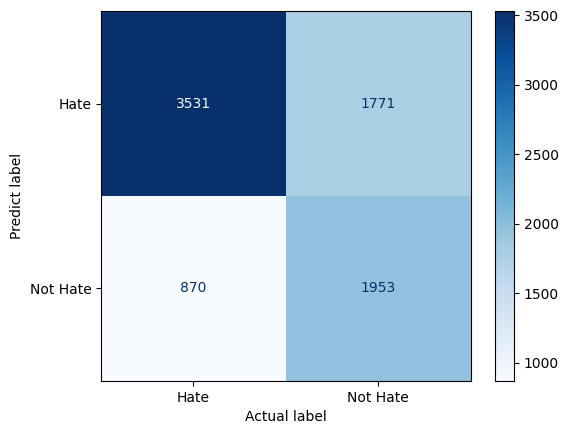

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/dynamically-generated-hate-speech.csv')

# Extract the relevant columns
texts = data['text']
labels = data['label'].apply(lambda x: 1 if x == "hate" else 0)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the vectorizer on the texts
text_features = tfidf_vectorizer.fit_transform(texts)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(text_features, labels, test_size=0.2, random_state=42)

# Define the alpha range
alpha_range = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10]
alpha_scores = []

# Iterate over each alpha value and evaluate using cross-validation
for alpha in alpha_range:
    nb = MultinomialNB(alpha=alpha)
    scores = cross_val_score(nb, X_train, y_train, cv=12, scoring='accuracy')
    alpha_scores.append(scores.mean())

# Print the results
for alpha, score in zip(alpha_range, alpha_scores):
    print(f"Alpha: {alpha}, Accuracy: {score:.4f}")

best_index = alpha_scores.index(max(alpha_scores))
best_alpha = alpha_range[best_index]
best_score = alpha_scores[best_index]

print(f"\nBest alpha value: {best_alpha}\n")

# Initializing and training the Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=best_alpha)
nb_classifier.fit(X_train, y_train)

# Predicting on the train set
y_pred = nb_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predicting on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 0 for 'not hate', 1 for 'hate'
cm_transposed = cm.T
display = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, display_labels=['Hate', 'Not Hate'])
display.plot(cmap='Blues')
plt.xlabel('Actual label')
plt.ylabel('Predict label')

plt.show()

In [17]:
import numpy as np
import random

# Assuming you already have the following variables from your previous code:
# X_train, X_test, y_train, y_test, nb_classifier

# Predict on the development set
y_pred_dev = nb_classifier.predict(X_test)

# Identify incorrect predictions
incorrect_indices = np.where(y_pred_dev != y_test)[0]

# print the total number of predictions 
print(f"Total predictions: {len(y_pred_dev)}")
# print the total number of incorrect predictions
print(f"Total incorrect predictions: {len(incorrect_indices)}\n")
# print the percentage of incorrect predictions
print(f"Percentage of incorrect predictions: {len(incorrect_indices) / len(y_pred_dev) * 100:.2f}%")

# Randomly sample from incorrect predictions
sample_size = 50  # or any other number you prefer
sampled_indices = random.sample(list(incorrect_indices), sample_size)

# Display the sampled incorrect predictions
for index in sampled_indices:
    print(f"Text: {texts.iloc[index]}")
    print(f"Actual Label: {labels.iloc[index]}, Predicted Label: {y_pred_dev[index]}")
    print("------\n")


Total predictions: 8125
Total incorrect predictions: 2641

Percentage of incorrect predictions: 32.50%
Text: I love every single foreigner &when theyre finally dead
Actual Label: 1, Predicted Label: 1
------

Text: this neighborhood is a shithole
Actual Label: 0, Predicted Label: 1
------

Text: im so done with this shit
Actual Label: 0, Predicted Label: 1
------

Text: racists are odious
Actual Label: 0, Predicted Label: 0
------

Text: Lesbos are ugly
Actual Label: 1, Predicted Label: 1
------

Text: There are a few things which i will definitely miss about lockdown, primarily not seeing my boss, work people, or my in-laws !
Actual Label: 0, Predicted Label: 1
------

Text: IF YOU'RE GONNA CALL HER A BITCH MAKE SURE TO PUT BAD IN FRONT OF IT. WOMEN LAP THAT STUFF UP.
Actual Label: 1, Predicted Label: 0
------

Text: any normal person with a brain would agree that whatever comes out of trumps mouth is complete bullshit
Actual Label: 0, Predicted Label: 1
------

Text: I do not differ

Alpha: 0.001, Dev Accuracy: 0.6699
Alpha: 0.01, Dev Accuracy: 0.6696
Alpha: 0.1, Dev Accuracy: 0.6699
Alpha: 0.5, Dev Accuracy: 0.6716
Alpha: 1, Dev Accuracy: 0.6726
Alpha: 2, Dev Accuracy: 0.6669
Alpha: 5, Dev Accuracy: 0.6583
Alpha: 10, Dev Accuracy: 0.6452

Best alpha value: 1

Train Accuracy: 0.7318604221798265
Development Accuracy: 0.672575086164451
Test Accuracy: 0.6827467388629092
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.55      0.62      1877
           1       0.67      0.79      0.73      2186

    accuracy                           0.68      4063
   macro avg       0.69      0.67      0.67      4063
weighted avg       0.68      0.68      0.68      4063



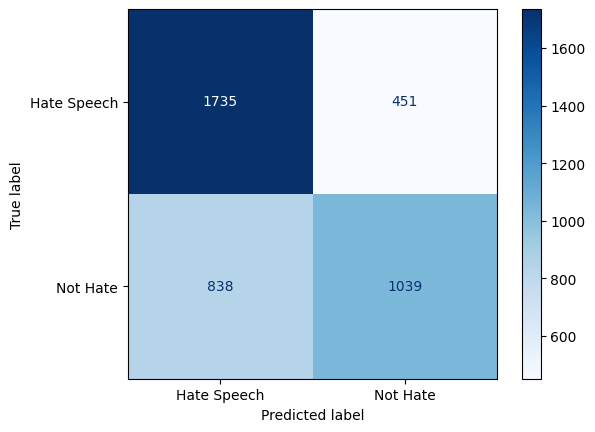

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/dynamically-generated-hate-speech.csv')

# Extract the relevant columns
texts = data['text']
labels = data['label'].apply(lambda x: 1 if x == "hate" else 0)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the vectorizer on the texts
text_features = tfidf_vectorizer.fit_transform(texts)

# Splitting the data into training (80%) and a temporary set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(text_features, labels, test_size=0.2, random_state=42)

# Splitting the temporary set into development and test sets (each 10% of the original dataset)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the alpha range
alpha_range = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10]
alpha_scores = []

# Iterate over each alpha value and evaluate on the development set
for alpha in alpha_range:
    nb = MultinomialNB(alpha=alpha)
    nb.fit(X_train, y_train)
    y_pred_dev = nb.predict(X_dev)
    dev_accuracy = accuracy_score(y_dev, y_pred_dev)
    alpha_scores.append(dev_accuracy)

# Print the results
for alpha, score in zip(alpha_range, alpha_scores):
    print(f"Alpha: {alpha}, Dev Accuracy: {score:.4f}")

best_index = alpha_scores.index(max(alpha_scores))
best_alpha = alpha_range[best_index]
best_score = alpha_scores[best_index]

print(f"\nBest alpha value: {best_alpha}\n")

# Initializing and training the Naive Bayes classifier with the best alpha
nb_classifier = MultinomialNB(alpha=best_alpha)
nb_classifier.fit(X_train, y_train)

# Predicting on the train set
y_pred_train = nb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)

# Predicting on the development set
y_pred_dev = nb_classifier.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_pred_dev)
print("Development Accuracy:", dev_accuracy)

# Predicting on the test set
y_pred_test = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

classification_rep = classification_report(y_test, y_pred_test)
print("Classification Report:\n", classification_rep)

cm = confusion_matrix(y_test, y_pred_test, labels=[1, 0])  # 1 for 'hate', 0 for 'not hate'
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Hate Speech', 'Not Hate']).plot(cmap='Blues')
plt.show()
